In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


sns.set(style="whitegrid", palette="Set2")

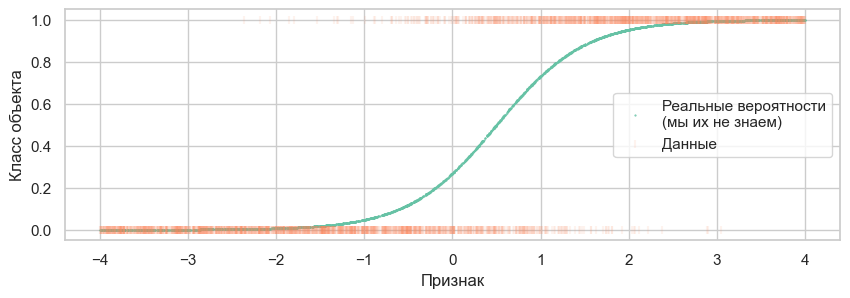

In [43]:
sample_size = 3_000  # Размер выборки

# Признаки
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();

In [44]:
from sklearn.linear_model import LogisticRegression
a = LogisticRegression(penalty=None, solver='lbfgs', fit_intercept=True, max_iter=10000)
a.fit(X, y.ravel())

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [45]:

import sklearn, sklearn.linear_model
print(sklearn.__version__)
print(sklearn.linear_model.__file__)



1.7.2
c:\Users\IvanC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\__init__.py


In [46]:
print("intercept_ (свободный член):", a.intercept_[0])
print("coef_ (коэффициент при признаке):", a.coef_[0][0])

intercept_ (свободный член): -0.9779241117610097
coef_ (коэффициент при признаке): 1.9987672844903324


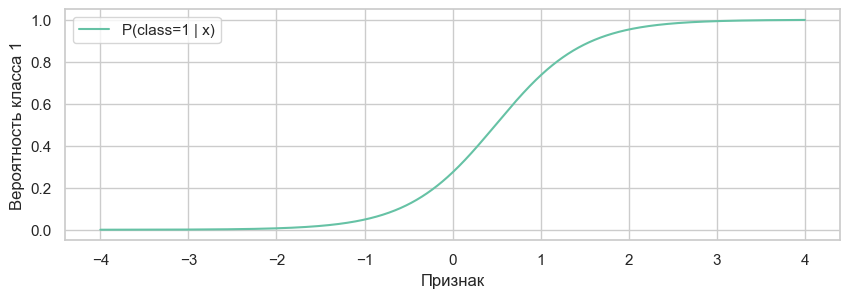

C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\2343589151.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


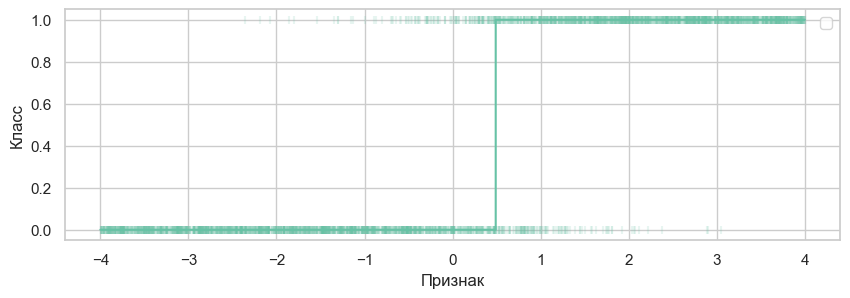

In [47]:
X_grid = np.linspace(-4, 4, 10_000).reshape((-1, 1))
a.predict(X_grid)
arr = np.array(10000,)
z = a.intercept_[0] + a.coef_[0][0] * X_grid[:, 0]
p_grid = 1.0 / (1.0 + np.exp(-z))
p_class = np.where(p_grid >= 0.5, 1, 0)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(X_grid[:, 0], p_grid, label='P(class=1 | x)')
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('Вероятность класса 1')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.step(X_grid[:,0], p_class)
plt.scatter(X[:,0], y, marker='|', alpha=0.15)
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('Класс')
plt.legend()


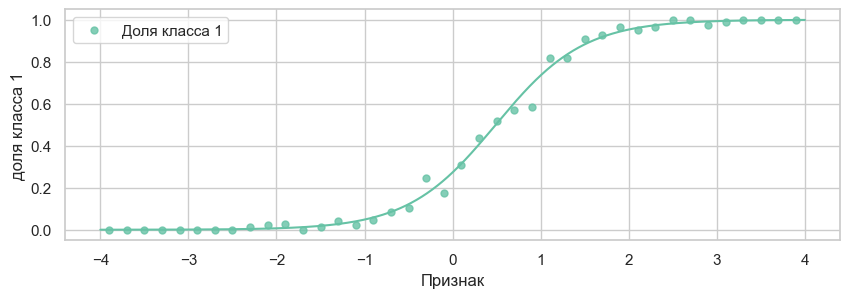

In [48]:
bins = np.array([x / 10.0 for x in range(-40, 41, 2)])
cen = (bins[:-1] + bins[1:]) / 2
index = np.digitize(X[:, 0], bins, right=False) - 1
index = np.clip(index, 0, len(bins) - 2) 

df = pd.DataFrame({'bin': index, 'y': y.ravel()})
df = df.groupby('bin')['y'].agg(['mean', 'size']).reset_index()

p_em = np.full(len(cen), np.nan)
p_em[df['bin'].to_numpy()] = df['mean'].to_numpy()


plt.figure(figsize=(10, 3))
plt.plot(X_grid[:, 0], p_grid)
plt.scatter(cen, p_em, s=25, alpha=0.8, label='Доля класса 1')
plt.ylim(-0.05, 1.05)
plt.xlabel('Признак')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend(); plt.show()

C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\2038145093.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


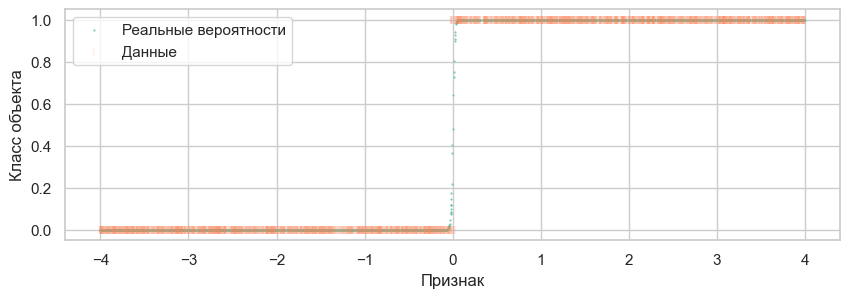

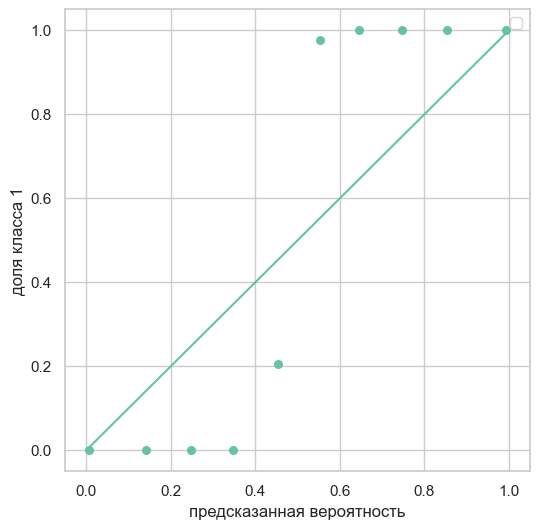

In [49]:
X = np.random.uniform(low=-4, high=4, size=(sample_size, 1))
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend();


mod = LogisticRegression(penalty="l2", fit_intercept=True, max_iter = 10000, solver = "lbfgs", C  = 0.1)
mod.fit(X, y)
p_h = mod.predict_proba(X)[:, 1]
bins = np.array([x / 10.0 for x in range(0, 11)])
index = np.digitize(p_h, bins, right=True) - 1
index = np.clip(index, 0, len(bins) - 2)

df = pd.DataFrame({'bin': index, 'p': p_h, 'y': y.ravel()})
g = df.groupby('bin').agg(p_mean=('p','mean'), y_mean=('y','mean')).reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], '-')
plt.scatter(g['p_mean'], g['y_mean'], s=30)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('предсказанная вероятность')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend()
plt.show()




C:\Users\IvanC\AppData\Local\Temp\ipykernel_31392\3111862182.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


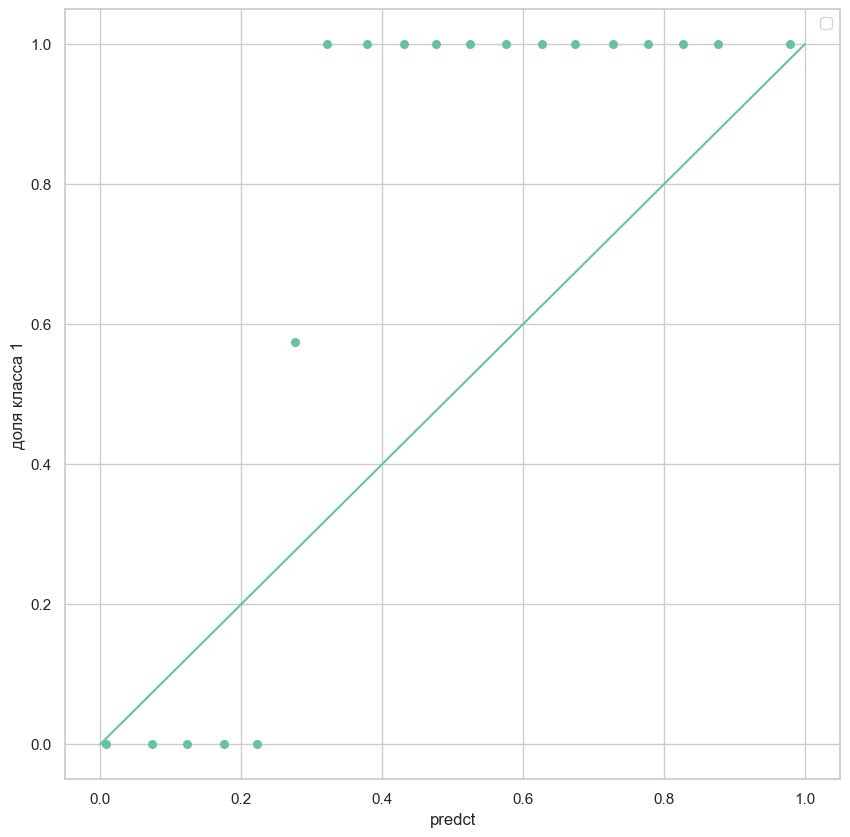

In [50]:

p_h = a.predict_proba(X)[:, 1]
bins = np.array([x / 100.0 for x in range(0, 100, 5)])
cen = (bins[:-1] + bins[1:]) / 2
index = np.digitize(p_h, bins, right=False) - 1
index = np.clip(index, 0, len(bins) - 2) 

df = pd.DataFrame({'bin': index, 'p': p_h, 'y': y.ravel()})
g = df.groupby('bin').agg(p_mean=('p','mean'), y_mean=('y','mean'))



plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], '-')
plt.scatter(g['p_mean'], g['y_mean'], s=30)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.xlabel('predct')
plt.ylabel('доля класса 1')
plt.grid(True)
plt.legend()
plt.show()




In [51]:
#next

In [52]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10_000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[:, -3:],
    columns=["feature_1", "feature_2", "target"],
)
data.head()

,feature_1,feature_2,target
0,0,0,0
1,1,1,1
2,1,0,0
3,1,0,1
4,0,0,0


In [53]:

share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
print(share)

                       target
feature_1 feature_2          
0         0          0.486068
          1          0.034295
1         0          0.508124
          1          0.653220


In [54]:

y = data['target']
X = data.drop(columns=['target'])

mod = LogisticRegression(penalty =None, fit_intercept=True, max_iter = 10000, solver = "lbfgs")
mod.fit(X, y)

unique = pd.DataFrame([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], columns=['feature_1', 'feature_2'])

p = mod.predict_proba(unique)
print(p)
print(p[:, 1])

#Чтобы было удобно сравнивать, создадим новый DataFrame, в котором будут 
# и реальные частоты (из прошлого задания), и предсказанные моделью вероятности.
share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
share['p'] = p[:, 1]
print(share)

[[0.8183876  0.1816124 ]
 [0.84233116 0.15766884]
 [0.41923941 0.58076059]
 [0.46115807 0.53884193]]
[0.1816124  0.15766884 0.58076059 0.53884193]
                       target         p
feature_1 feature_2                    
0         0          0.486068  0.181612
          1          0.034295  0.157669
1         0          0.508124  0.580761
          1          0.653220  0.538842


In [55]:
X = data[['feature_1','feature_2']]
y = data['target']
X['x1x2'] = X['feature_1'] * X['feature_2']

mod = LogisticRegression(penalty=None, fit_intercept = True, solver='lbfgs', max_iter=10000)
mod.fit(X, y)

grid = pd.DataFrame([(0,0,0),(0,1,0),(1,0,0),(1,1,1)], columns=['feature_1','feature_2','x1x2'])
share = data.pivot_table(index=['feature_1', 'feature_2'], values='target', aggfunc='mean')
share['p'] = mod.predict_proba(grid)[:,1]
print(share)

                       target         p
feature_1 feature_2                    
0         0          0.486068  0.486135
          1          0.034295  0.034175
1         0          0.508124  0.508252
          1          0.653220  0.653182


In [56]:
dataset = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [57]:
from sklearn.base import BaseEstimator
from scipy.special import logsumexp
from time import time
from typing import Literal


class LogisticRegression(BaseEstimator):

    def __init__(
        self,
        method: Literal["gd", "sgd"] = "gd",
        learning_rate: float = 0.5,
        tol: float = 1e-3,
        max_iter: int = int(1e4),
        batch_size: int = 64,
        fit_intercept: bool = True,
        save_history: bool = True,
    ):
        """Создает модель и инициализирует параметры."""
        self.method = method
        self.learning_rate = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = []
        self.coef_ = None
        self.intercept_ = None
        self.n_iter_ = 0

    @staticmethod
    def _sigmoid(x: np.ndarray) -> np.ndarray:
        """Вычисляет сигмоидную функцию."""
        return 1 / (1 + np.exp(-x))

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет свободный коэффициент к матрице признаков."""
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1.0)
        X_copy[:, :-1] = X
        return X_copy

    def fit(self, X: np.ndarray, Y: np.ndarray) -> "LogisticRegression":
        """Обучает модель логистической регрессии."""
        if hasattr(X, 'values'):
            X_np = X.values
        else:
            X_np = np.asarray(X)

        if hasattr(Y, 'values'):
            Y_np = Y.values
        else:
            Y_np = np.asarray(Y)
        if X_np.shape[0] != Y_np.shape[0]:
            raise ValueError("Количество строк в X и Y должно совпадать")
        if self.fit_intercept:
            X_copy = self._add_intercept(X_np)
        else:
            X_copy = X_np.copy()

        len_data = X_copy.shape[0]
        len_feature = X_copy.shape[1]

        self.weights = np.zeros(len_feature)

        prev_loss = 1000000000000000000
        start_time = time()
        
        for i in range(self.max_iter):
            if self.method == "gd":
                X_train, Y_train  = X_copy, Y_np
            if self.method == "sgd":
                index = np.random.choice(len_data, self.batch_size, replace = False)
                X_train, Y_train = X_copy[index], Y_np[index]
            z = X_train @ self.weights
            predictions = self._sigmoid(z)
            error = predictions - Y_train
            gradient = (X_train.T @ error) / X_train.shape[0]
            self.weights = self.weights - self.learning_rate * gradient

            z_full = X_copy @ self.weights
            log_p = logsumexp(np.vstack([np.zeros_like(z_full), z_full]), axis=0)
            loss_function = np.mean(log_p - Y_np * z_full)
            
            if self.save_history:
                end_time = time() - start_time
                self.history.append([loss_function, end_time])
                start_time = time()
            if abs(prev_loss - loss_function) < self.tol:
                print(f"stop, <tl, itre: {i+1}.")
                break
            prev_loss = loss_function

        self.n_iter_ = i + 1
        
        if self.fit_intercept:
            self.coef_ = self.weights[:-1]
            self.intercept_ = self.weights[-1]
        else:
            self.coef_ = self.weights
            self.intercept_ = 0.0
    

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        
        prob_class_1 = self.predict_proba(X)[:, 1]
        predictions = (prob_class_1 >= 0.5).astype(int)
        return predictions

    def predict_proba(self, X: np.ndarray) -> np.ndarray:

        predictions_class_1 =  self._sigmoid(X @ self.coef_ + self.intercept_)
        predictions_class_0 = 1 - predictions_class_1
        predictions_proba = np.column_stack((predictions_class_0, predictions_class_1))
        return predictions_proba

In [58]:

Y = dataset['Diabetes_binary']
X = dataset.drop(columns=['Diabetes_binary'])

RandomState = 42
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=RandomState, 
    stratify=Y
)
cat_cols = [c for c in X.columns if X[c].dtype == "O" or X[c].nunique() <= 20]


X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=False)
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=False)
X_train_final, X_test_final = X_train_enc.align(X_test_enc, join='inner', axis=1)


print(f"X_train_final: {X_train_final.shape}")
print(f"X_test_final:  {X_test_final.shape}")


print(f"train: {len(X_train_final.columns)}")
print(f"test:  {len(X_test_final.columns)}")

X_train_final: (56553, 63)
X_test_final:  (14139, 63)
train: 63
test:  63


In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_cols = [c for c in X_train.columns if c not in cat_cols]
X_train = X_train_final.copy()
X_test = X_test_final.copy()
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train_final[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test_final[numerical_cols])

print(X_train.head())

            BMI  MentHlth  PhysHlth  HighBP_0.0  HighBP_1.0  HighChol_0.0  \
47977 -0.119897 -0.459731 -0.575632       False        True          True   
2676  -0.822423  1.386706  0.023063        True       False         False   
35637  1.706673 -0.459731  0.422192       False        True          True   
52420  0.020609 -0.459731 -0.475849       False        True         False   
12445  0.723136 -0.459731 -0.575632       False        True          True   

       HighChol_1.0  CholCheck_0.0  CholCheck_1.0  Smoker_0.0  ...  \
47977         False          False           True       False  ...   
2676           True          False           True       False  ...   
35637         False          False           True       False  ...   
52420          True          False           True        True  ...   
12445         False          False           True       False  ...   

       Education_5.0  Education_6.0  Income_1.0  Income_2.0  Income_3.0  \
47977          False           True      

In [ ]:
model_gd = LogisticRegression(method="gd")
model_gd.fit(X_train, Y_train)

model_sgd = LogisticRegression(method="sgd")
model_sgd.fit(X_train, Y_train)


stop, <tl, itre: 20.
stop, <tl, itre: 9.


,method,'sgd'
,learning_rate,0.5
,tol,0.001
,max_iter,10000
,batch_size,64
,fit_intercept,True
,save_history,True


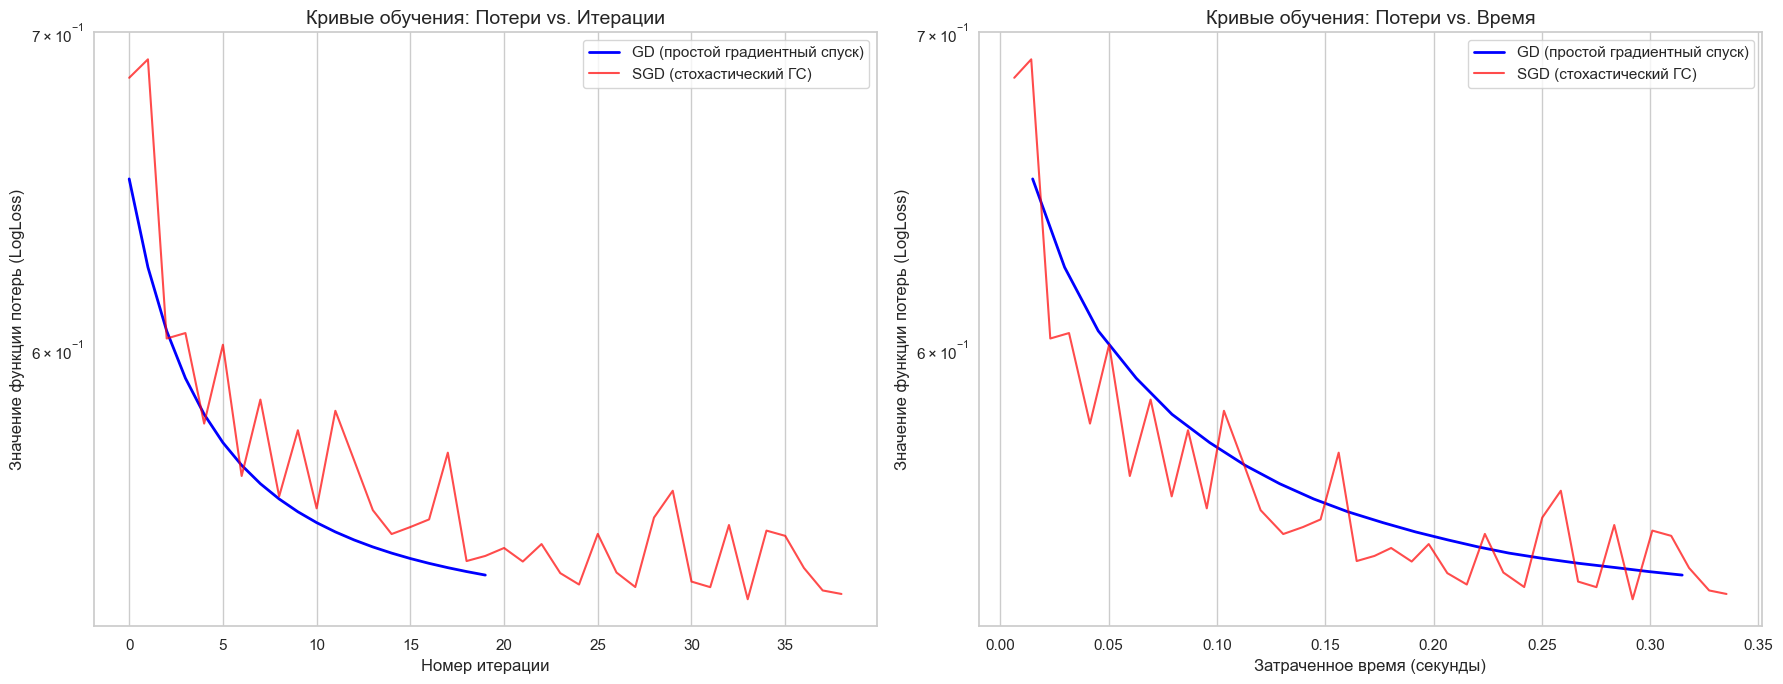

In [ ]:
loss_history_gd = [item[0] for item in model_gd.history]
time_history_gd = [item[1] for item in model_gd.history]
cumulative_time_gd = np.cumsum(time_history_gd)
loss_history_sgd = [item[0] for item in model_sgd.history]
time_history_sgd = [item[1] for item in model_sgd.history]
cumulative_time_sgd = np.cumsum(time_history_sgd)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
ax1.plot(loss_history_gd, label='GD (простой градиентный спуск)', color='blue', linewidth=2)
ax1.plot(loss_history_sgd, label='SGD (стохастический ГС)', color='red', alpha=0.7)

ax1.set_title('Кривые обучения: Потери vs. Итерации', fontsize=14)
ax1.set_xlabel('Номер итерации', fontsize=12)
ax1.set_ylabel('Значение функции потерь (LogLoss)', fontsize=12)
ax1.legend()
ax1.grid(True)
ax1.set_yscale('log')
ax2.plot(cumulative_time_gd, loss_history_gd, label='GD (простой градиентный спуск)', color='blue', linewidth=2)
ax2.plot(cumulative_time_sgd, loss_history_sgd, label='SGD (стохастический ГС)', color='red', alpha=0.7)
ax2.set_title('Кривые обучения: Потери vs. Время', fontsize=14)
ax2.set_xlabel('Затраченное время (секунды)', fontsize=12)
ax2.set_ylabel('Значение функции потерь (LogLoss)', fontsize=12)
ax2.legend()
ax2.grid(True)
ax2.set_yscale('log')
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score

learning_rate_list = np.logspace(-5, 3, 8)

accuracies_gd = []
accuracies_sgd = []

max_iter_experiment = 1000 

for lr in learning_rate_list:
    try:
        model_gd = LogisticRegression(method="gd", learning_rate=lr, max_iter=max_iter_experiment, save_history=False)
        model_gd.fit(X_train, Y_train)
        preds_gd = model_gd.predict(X_test)
        acc_gd = accuracy_score(Y_test, preds_gd)
    except (ValueError, FloatingPointError):
        acc_gd = 0.0
    accuracies_gd.append(acc_gd)
    try:
        model_sgd = LogisticRegression(method="sgd", learning_rate=lr, max_iter=max_iter_experiment, save_history=False)
        model_sgd.fit(X_train, Y_train)
        preds_sgd = model_sgd.predict(X_test)
        acc_sgd = accuracy_score(Y_test, preds_sgd)
    except (ValueError, FloatingPointError):
        acc_sgd = 0.0
    accuracies_sgd.append(acc_sgd)
    
    print(f"  lr = {lr:.5f} | Accuracy GD: {acc_gd:.4f} | Accuracy SGD: {acc_sgd:.4f}")
plt.figure(figsize=(12, 7))
plt.plot(learning_rate_list, accuracies_gd, label='GD', marker='o')
plt.plot(learning_rate_list, accuracies_sgd, label='SGD', marker='x')

plt.xscale('log')

plt.title('Влияние learning_rate на качество модели', fontsize=14)
plt.xlabel('learning_rate', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

stop, <tl, itre: 2.
stop, <tl, itre: 2.
  lr = 0.00001 | Accuracy GD: 0.6967 | Accuracy SGD: 0.5199
stop, <tl, itre: 2.
stop, <tl, itre: 2.
  lr = 0.00014 | Accuracy GD: 0.6967 | Accuracy SGD: 0.5495
stop, <tl, itre: 2.
stop, <tl, itre: 2.
  lr = 0.00193 | Accuracy GD: 0.6968 | Accuracy SGD: 0.5852
stop, <tl, itre: 49.
stop, <tl, itre: 35.
  lr = 0.02683 | Accuracy GD: 0.7174 | Accuracy SGD: 0.6967
stop, <tl, itre: 23.
stop, <tl, itre: 22.
  lr = 0.37276 | Accuracy GD: 0.7307 | Accuracy SGD: 0.7213
stop, <tl, itre: 218.
  lr = 5.17947 | Accuracy GD: 0.6721 | Accuracy SGD: 0.7081
  lr = 71.96857 | Accuracy GD: 0.6682 | Accuracy SGD: 0.6629


In [ ]:
lrs_to_plot = [learning_rate_list[0], learning_rate_list[3], learning_rate_list[5], learning_rate_list[7]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

ax1.set_title('Кривые обучения для GD', fontsize=14)
ax1.set_xlabel('Номер итерации', fontsize=12)
ax1.set_ylabel('Значение функции потерь (LogLoss)', fontsize=12)
ax1.set_xscale('log') 
ax1.set_yscale('log') 
ax1.grid(True, which="both", ls="--")
ax2.set_title('Кривые обучения для SGD', fontsize=14)
ax2.set_xlabel('Номер итерации', fontsize=12)
ax2.grid(True, which="both", ls="--")
ax2.set_xscale('log')

for lr in lrs_to_plot:
    #GD
    model_gd = LogisticRegression(method="gd", learning_rate=lr, max_iter=2000, save_history=True)
    model_gd.fit(X_train, Y_train)
    loss_gd = [h[0] for h in model_gd.history]
    ax1.plot(loss_gd, label=f'lr = {lr:.5f}')

    # SGD
    model_sgd = LogisticRegression(method="sgd", learning_rate=lr, max_iter=2000, save_history=True)
    model_sgd.fit(X_train, Y_train)
    loss_sgd = [h[0] for h in model_sgd.history]
    ax2.plot(loss_sgd, label=f'lr = {lr:.5f}')

ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

stop, <tl, itre: 2.
stop, <tl, itre: 2.
stop, <tl, itre: 49.
stop, <tl, itre: 17.
stop, <tl, itre: 68.


C:\Users\IvanC\AppData\Local\Temp\ipykernel_23588\1719685953.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


stop, <tl, itre: 23.
stop, <tl, itre: 5.
Лучшая модель: GD, accuracy=0.731


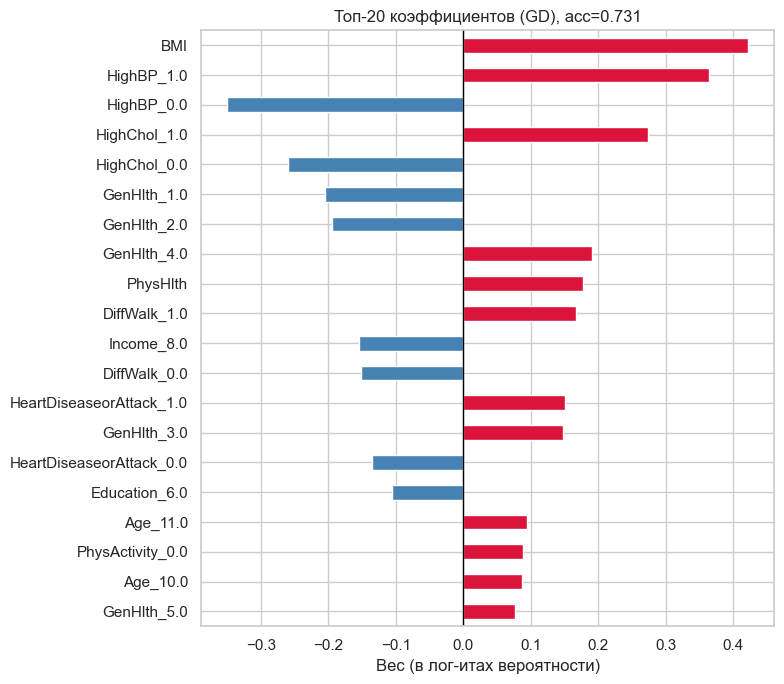

,coef,odds_ratio
BMI,0.421522,1.524280
HighBP_1.0,0.364241,1.439421
HighBP_0.0,-0.349490,0.705048
HighChol_1.0,0.273713,1.314837
HighChol_0.0,-0.258962,0.771852
GenHlth_1.0,-0.205049,0.814607
GenHlth_2.0,-0.193990,0.823666
GenHlth_4.0,0.190216,1.209510
PhysHlth,0.176829,1.193427
DiffWalk_1.0,0.166551,1.181224


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
best_lr_gd  = learning_rate_list[int(np.argmax(accuracies_gd))]
best_lr_sgd = learning_rate_list[int(np.argmax(accuracies_sgd))]

model_gd_best = LogisticRegression(method="gd",  learning_rate=best_lr_gd/10.0,  max_iter= 100000, save_history=False)
model_sgd_best= LogisticRegression(method="sgd", learning_rate=best_lr_sgd/10.0, max_iter=100000, save_history=False)

model_gd_best.fit(X_train, Y_train)
model_sgd_best.fit(X_train, Y_train)

acc_gd_best  = accuracy_score(Y_test, model_gd_best.predict(X_test))
acc_sgd_best = accuracy_score(Y_test, model_sgd_best.predict(X_test))

best_name, best_model, best_acc = max(
    [('GD', model_gd_best, acc_gd_best), ('SGD', model_sgd_best, acc_sgd_best)],
    key=lambda x: x[2]
)

print(f'Лучшая модель: {best_name}, accuracy={best_acc:.3f}')
coef_s = pd.Series(best_model.coef_, index=X_train.columns)
top_n = 20
top = coef_s.reindex(coef_s.abs().sort_values(ascending=False).index)[:top_n]

plt.figure(figsize=(8, max(6, top_n*0.35)))
colors = ['crimson' if v>0 else 'steelblue' for v in top[::-1].values]
top[::-1].plot(kind='barh', color=colors)
plt.axvline(0, color='k', lw=1)
plt.title(f'Топ-{top_n} коэффициентов ({best_name}), acc={best_acc:.3f}')
plt.xlabel('Вес')
plt.tight_layout()
plt.show()
pd.DataFrame({'coef': top, 'odds_ratio': np.exp(top)}).head(10)

In [ ]:


majority_class = Y_train.value_counts().idxmax()
y_pred_baseline = np.repeat(majority_class, len(Y_test))
acc_baseline = accuracy_score(Y_test, y_pred_baseline)

print(f'Baseline (majority={majority_class}) accuracy: {acc_baseline:.3f}')
print(f'Best model ({best_name}) accuracy: {best_acc:.3f}')


Baseline (majority=1.0) accuracy: 0.500
Best model (GD) accuracy: 0.731
